In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.0 MB/s eta 0:00:00


In [2]:
!pip install -U scikit-fuzzy networks

  Preparing metadata (setup.py) ... done
  Created wheel for networks: filename=networks-0.3.7-py3-none-any.whl size=11635 sha256=e6587d779710cb7101d452e7d9418b1125c2c5b5e8a4086e52186995b0b700dd
  Stored in directory: /root/.cache/pip/wheels/be/b0/6b/07d2794f8e72e55e28e1773c30af7e3ba5de18a980d1f137ad
Successfully built networks


In [3]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [23]:
# Define fuzzy input variables
velocity = ctrl.Antecedent(np.arange(0, 10, 0.1), 'velocity')
confidence = ctrl.Antecedent(np.arange(0, 1, 0.01), 'confidence')
position_change = ctrl.Antecedent(np.arange(0, 100, 1), 'position_change')

In [15]:
# Define fuzzy output variables
iou_threshold = ctrl.Consequent(np.arange(0.2, 0.8, 0.01), 'iou_threshold')
association_distance = ctrl.Consequent(np.arange(20, 70, 1), 'association_distance')

# **velocity**

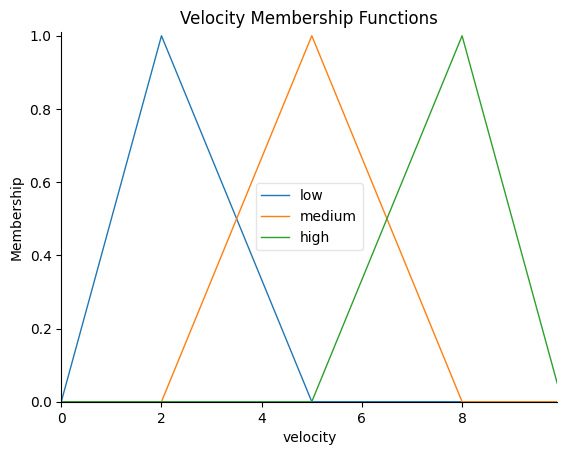

In [31]:
# Define fuzzy variable
velocity = ctrl.Antecedent(np.arange(0, 10, 0.1), 'velocity')

# Define membership functions
velocity['low'] = fuzz.trimf(velocity.universe, [0, 2, 5])
velocity['medium'] = fuzz.trimf(velocity.universe, [2, 5, 8])
velocity['high'] = fuzz.trimf(velocity.universe, [5, 8, 10])

# View the membership functions
velocity.view()
plt.title('Velocity Membership Functions')
plt.show()

# **confidence**

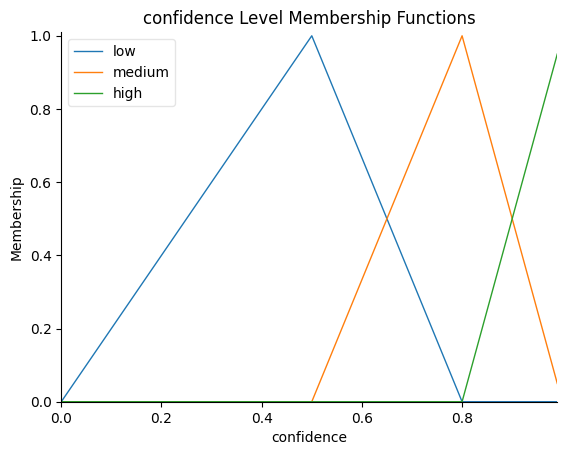

In [35]:
# Define fuzzy variable
confidence = ctrl.Antecedent(np.arange(0, 1, 0.01), 'confidence')

# Define membership functions
confidence['low'] = fuzz.trimf(confidence.universe, [0, 0.5, 0.8])
confidence['medium'] = fuzz.trimf(confidence.universe, [0.5, 0.8, 1.0])
confidence['high'] = fuzz.trimf(confidence.universe, [0.8, 1.0, 1.0])

# View the membership functions
confidence.view()
plt.title('confidence Level Membership Functions')
plt.show()

# **position_change**

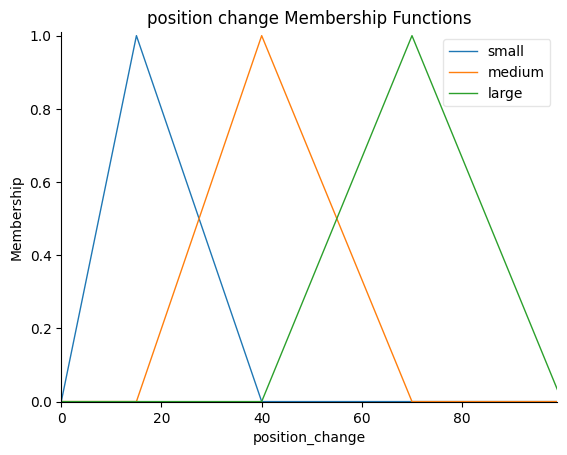

In [34]:
# Define fuzzy variable
position_change = ctrl.Antecedent(np.arange(0, 100, 1), 'position_change')

# Define membership functions
position_change['small'] = fuzz.trimf(position_change.universe, [0, 15, 40])
position_change['medium'] = fuzz.trimf(position_change.universe, [15, 40, 70])
position_change['large'] = fuzz.trimf(position_change.universe, [40, 70, 100])

# View the membership functions
position_change.view()
plt.title('position change Membership Functions')
plt.show()

# **iou_threshold**

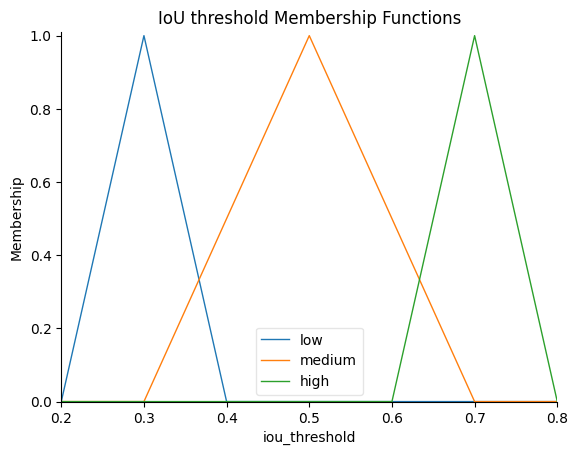

In [40]:
# Define fuzzy variable
iou_threshold = ctrl.Consequent(np.arange(0.2, 0.8, 0.01), 'iou_threshold')

# Membership functions for IoU threshold
iou_threshold['low'] = fuzz.trimf(iou_threshold.universe, [0.2, 0.3, 0.4])
iou_threshold['medium'] = fuzz.trimf(iou_threshold.universe, [0.3, 0.5, 0.7])
iou_threshold['high'] = fuzz.trimf(iou_threshold.universe, [0.6, 0.7, 0.8])

# View the membership functions
iou_threshold.view()
plt.title('IoU threshold Membership Functions')
plt.show()

# **association_distance**

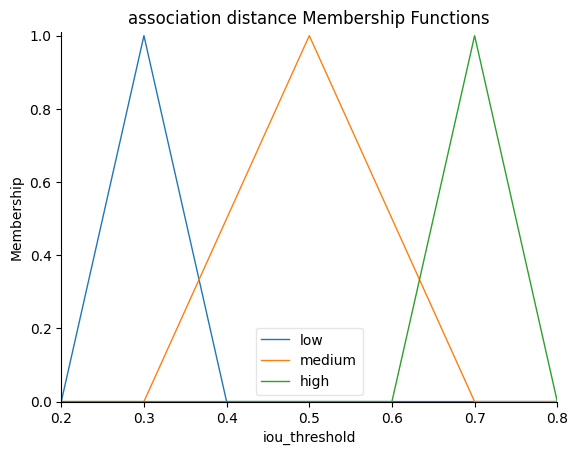

In [41]:
# Define fuzzy variable
association_distance = ctrl.Consequent(np.arange(20, 70, 1), 'association_distance')

# Membership functions for IoU threshold
association_distance['small'] = fuzz.trimf(association_distance.universe, [20, 30, 40])
association_distance['medium'] = fuzz.trimf(association_distance.universe, [30, 40, 50])
association_distance['large'] = fuzz.trimf(association_distance.universe, [40, 50, 60])

# View the membership functions
iou_threshold.view()
plt.title('association distance Membership Functions')
plt.show()

In [44]:
rules = [
    # Rules for IoU threshold
    ctrl.Rule(velocity['low'] & confidence['low'] & position_change['small'], iou_threshold['low']),
    ctrl.Rule(velocity['low'] & confidence['medium'] & position_change['small'], iou_threshold['medium']),
    ctrl.Rule(velocity['low'] & confidence['high'] & position_change['small'], iou_threshold['high']),
    ctrl.Rule(velocity['medium'] & confidence['low'] & position_change['small'], iou_threshold['low']),
    ctrl.Rule(velocity['medium'] & confidence['medium'] & position_change['small'], iou_threshold['medium']),
    ctrl.Rule(velocity['medium'] & confidence['high'] & position_change['small'], iou_threshold['high']),
    ctrl.Rule(velocity['high'] & confidence['low'] & position_change['small'], iou_threshold['low']),
    ctrl.Rule(velocity['high'] & confidence['medium'] & position_change['small'], iou_threshold['medium']),
    ctrl.Rule(velocity['high'] & confidence['high'] & position_change['small'], iou_threshold['high']),
    ctrl.Rule(velocity['low'] & confidence['low'] & position_change['medium'], iou_threshold['low']),
    ctrl.Rule(velocity['low'] & confidence['medium'] & position_change['medium'], iou_threshold['medium']),
    ctrl.Rule(velocity['low'] & confidence['high'] & position_change['medium'], iou_threshold['medium']),
    ctrl.Rule(velocity['medium'] & confidence['low'] & position_change['medium'], iou_threshold['low']),
    ctrl.Rule(velocity['medium'] & confidence['medium'] & position_change['medium'], iou_threshold['medium']),
    ctrl.Rule(velocity['medium'] & confidence['high'] & position_change['medium'], iou_threshold['medium']),
    ctrl.Rule(velocity['high'] & confidence['low'] & position_change['medium'], iou_threshold['low']),
    ctrl.Rule(velocity['high'] & confidence['medium'] & position_change['medium'], iou_threshold['low']),
    ctrl.Rule(velocity['high'] & confidence['high'] & position_change['medium'], iou_threshold['medium']),
    ctrl.Rule(velocity['low'] & confidence['low'] & position_change['large'], iou_threshold['low']),
    ctrl.Rule(velocity['low'] & confidence['medium'] & position_change['large'], iou_threshold['low']),
    ctrl.Rule(velocity['low'] & confidence['high'] & position_change['large'], iou_threshold['medium']),
    ctrl.Rule(velocity['medium'] & confidence['low'] & position_change['large'], iou_threshold['low']),
    ctrl.Rule(velocity['medium'] & confidence['medium'] & position_change['large'], iou_threshold['low']),
    ctrl.Rule(velocity['medium'] & confidence['high'] & position_change['large'], iou_threshold['medium']),
    ctrl.Rule(velocity['high'] & confidence['low'] & position_change['large'], iou_threshold['low']),
    ctrl.Rule(velocity['high'] & confidence['medium'] & position_change['large'], iou_threshold['low']),
    ctrl.Rule(velocity['high'] & confidence['high'] & position_change['large'], iou_threshold['low']),


    # Rules for Association Distance
    ctrl.Rule(velocity['low'] & confidence['low'] & position_change['small'], association_distance['small']),
    ctrl.Rule(velocity['low'] & confidence['medium'] & position_change['small'], association_distance['small']),
    ctrl.Rule(velocity['low'] & confidence['high'] & position_change['small'], association_distance['medium']),
    ctrl.Rule(velocity['medium'] & confidence['low'] & position_change['small'], association_distance['small']),
    ctrl.Rule(velocity['medium'] & confidence['medium'] & position_change['small'], association_distance['medium']),
    ctrl.Rule(velocity['medium'] & confidence['high'] & position_change['small'], association_distance['medium']),
    ctrl.Rule(velocity['high'] & confidence['low'] & position_change['small'], association_distance['medium']),
    ctrl.Rule(velocity['high'] & confidence['medium'] & position_change['small'], association_distance['medium']),
    ctrl.Rule(velocity['high'] & confidence['high'] & position_change['small'], association_distance['large']),
    ctrl.Rule(velocity['low'] & confidence['low'] & position_change['medium'], association_distance['small']),
    ctrl.Rule(velocity['low'] & confidence['medium'] & position_change['medium'], association_distance['small']),
    ctrl.Rule(velocity['low'] & confidence['high'] & position_change['medium'], association_distance['medium']),
    ctrl.Rule(velocity['medium'] & confidence['low'] & position_change['medium'], association_distance['small']),
    ctrl.Rule(velocity['medium'] & confidence['medium'] & position_change['medium'], association_distance['medium']),
    ctrl.Rule(velocity['medium'] & confidence['high'] & position_change['medium'], association_distance['large']),
    ctrl.Rule(velocity['high'] & confidence['low'] & position_change['medium'], association_distance['medium']),
    ctrl.Rule(velocity['high'] & confidence['medium'] & position_change['medium'], association_distance['large']),
    ctrl.Rule(velocity['high'] & confidence['high'] & position_change['medium'], association_distance['large']),
    ctrl.Rule(velocity['low'] & confidence['low'] & position_change['large'], association_distance['medium']),
    ctrl.Rule(velocity['low'] & confidence['medium'] & position_change['large'], association_distance['medium']),
    ctrl.Rule(velocity['low'] & confidence['high'] & position_change['large'], association_distance['large']),
    ctrl.Rule(velocity['medium'] & confidence['low'] & position_change['large'], association_distance['medium']),
    ctrl.Rule(velocity['medium'] & confidence['medium'] & position_change['large'], association_distance['large']),
    ctrl.Rule(velocity['medium'] & confidence['high'] & position_change['large'], association_distance['large']),
    ctrl.Rule(velocity['high'] & confidence['low'] & position_change['large'], association_distance['large']),
    ctrl.Rule(velocity['high'] & confidence['medium'] & position_change['large'], association_distance['large']),
    ctrl.Rule(velocity['high'] & confidence['high'] & position_change['large'], association_distance['large'])
]

# Fuzzy control system
tracking_ctrl = ctrl.ControlSystem(rules)
tracking_simulation = ctrl.ControlSystemSimulation(tracking_ctrl)

Recommended IoU Threshold: 0.42
Recommended Association Distance: 33.64


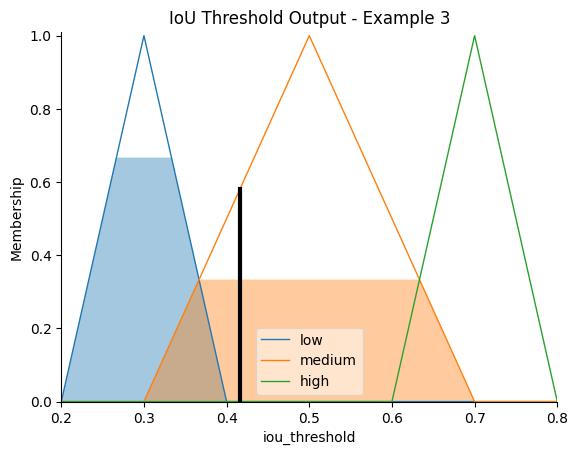

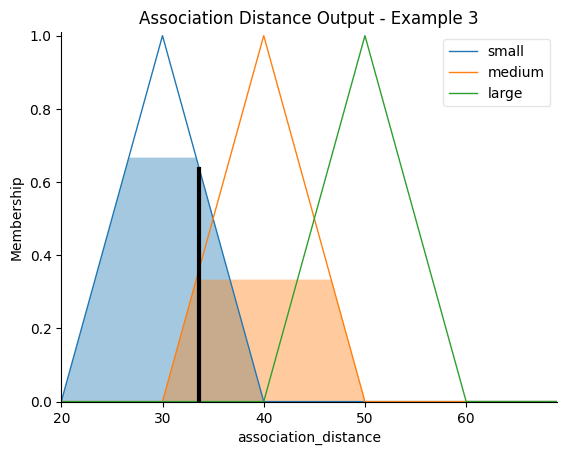

In [49]:
# Example for Medium-speed object with medium confidence
velocity_input = 5.0  # Medium velocity
confidence_input = 0.6  # Medium confidence
position_change_input = 40  # Medium position change

# Set input values
tracking_simulation.input['velocity'] = velocity_input
tracking_simulation.input['confidence'] = confidence_input
tracking_simulation.input['position_change'] = position_change_input

# Compute fuzzy logic
tracking_simulation.compute()

# Get outputs
iou_threshold_output = tracking_simulation.output['iou_threshold']
association_distance_output = tracking_simulation.output['association_distance']

print(f"Recommended IoU Threshold: {iou_threshold_output:.2f}")
print(f"Recommended Association Distance: {association_distance_output:.2f}")

# Visualize output
iou_threshold.view(sim=tracking_simulation)
plt.title('IoU Threshold Output - Example 3')
plt.show()

association_distance.view(sim=tracking_simulation)
plt.title('Association Distance Output - Example 3')
plt.show()


Recommended IoU Threshold: 0.30
Recommended Association Distance: 50.00


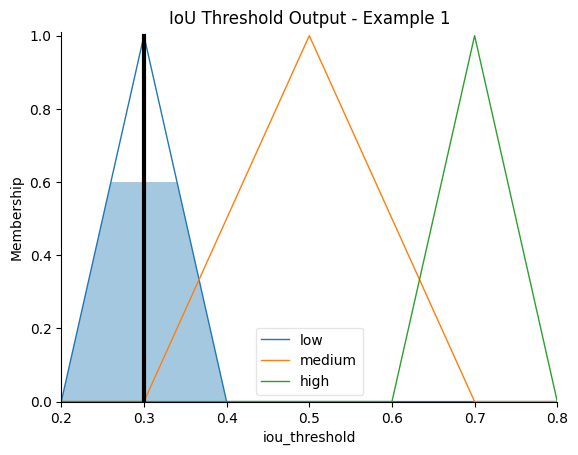

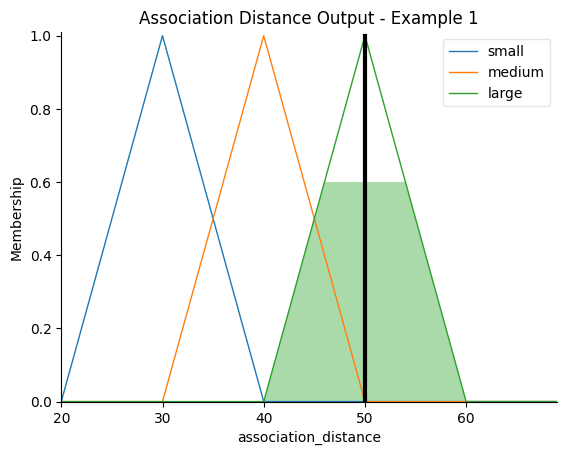

In [47]:
# Example Fast-moving object with low confidence
velocity_input = 8.5  # High velocity
confidence_input = 0.3  # Low confidence
position_change_input = 75  # Large position change

# Set input values
tracking_simulation.input['velocity'] = velocity_input
tracking_simulation.input['confidence'] = confidence_input
tracking_simulation.input['position_change'] = position_change_input

# Compute fuzzy logic
tracking_simulation.compute()

# Get outputs
iou_threshold_output = tracking_simulation.output['iou_threshold']
association_distance_output = tracking_simulation.output['association_distance']

print(f"Recommended IoU Threshold: {iou_threshold_output:.2f}")
print(f"Recommended Association Distance: {association_distance_output:.2f}")

# Visualize output
iou_threshold.view(sim=tracking_simulation)
plt.title('IoU Threshold Output - Example 1')
plt.show()

association_distance.view(sim=tracking_simulation)
plt.title('Association Distance Output - Example 1')
plt.show()


Recommended IoU Threshold: 0.56
Recommended Association Distance: 35.00


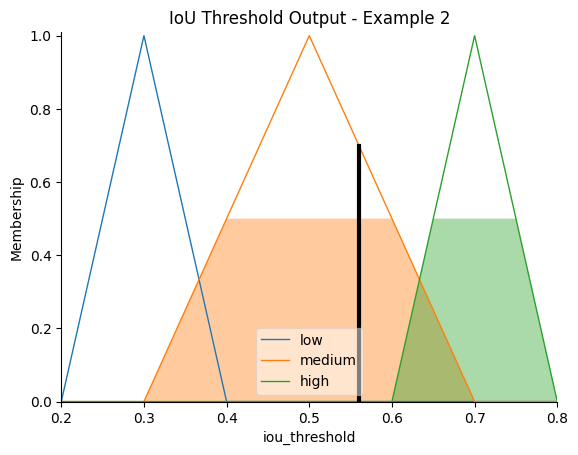

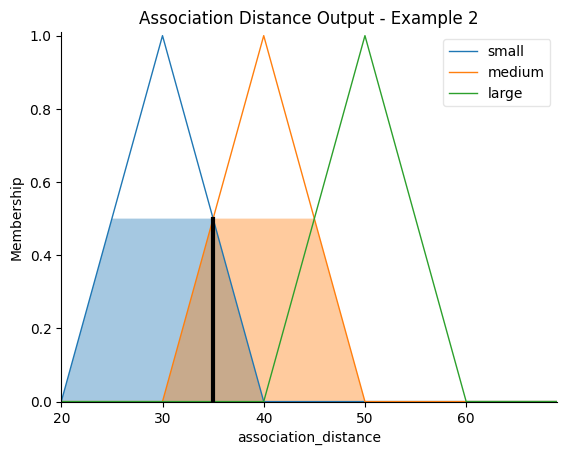

In [48]:
# Example for Slow-moving object with high confidence
velocity_input = 1.5  # Low velocity
confidence_input = 0.9  # High confidence
position_change_input = 10  # Small position change

# Set input values
tracking_simulation.input['velocity'] = velocity_input
tracking_simulation.input['confidence'] = confidence_input
tracking_simulation.input['position_change'] = position_change_input

# Compute fuzzy logic
tracking_simulation.compute()

# Get outputs
iou_threshold_output = tracking_simulation.output['iou_threshold']
association_distance_output = tracking_simulation.output['association_distance']

print(f"Recommended IoU Threshold: {iou_threshold_output:.2f}")
print(f"Recommended Association Distance: {association_distance_output:.2f}")

# Visualize output
iou_threshold.view(sim=tracking_simulation)
plt.title('IoU Threshold Output - Example 2')
plt.show()

association_distance.view(sim=tracking_simulation)
plt.title('Association Distance Output - Example 2')
plt.show()
